# excercise 2: MDS + Multinomial Logistic Regression

## Importing the libraries

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn.metrics import mutual_info_score



## Importing the dataset

In [61]:
D=10
#Load data and assign a name to features

features = ["F"+str(x) for x in range(1,D+1,1)]
dataset: pd.DataFrame = pd.read_csv("data_kPCA.txt", sep = " ", 
                                header = None, 
                                names  = features, 
                                index_col = False)

labels: pd.DataFrame = pd.read_csv("labels_kPCA.txt",  
                                header = None, 
                                names  = ["labels"], 
                                index_col = False)
dataset["labels"] = labels["labels"]

limit = 2000
X = dataset.iloc[:limit, :-1].values  
y = dataset.iloc[:limit, -1].values

## Splitting the dataset into the Training set and Test set

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [63]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#distance matrix




In [64]:
from sklearn.metrics.pairwise import euclidean_distances
distance_matrix = euclidean_distances(X_train.T)**2

In [65]:
centering_matrix = lambda n: np.identity(n) -(np.ones((n, 1)) @ np.ones((1, n)))/n


In [91]:
def MDS(distance_matrix, K):
    # Double checking that the matrix is the right size
    N = distance_matrix.shape[0]
    assert distance_matrix.shape[0] == distance_matrix.shape[1], 'dist should be a square matrix, but it\'s {}x{}'.format(dist.shape)
    
    # Compute the Gram matrix from the distance_matrix
    gram_from_dist = -(centering_matrix(N) @ distance_matrix @ centering_matrix(N))/2

    # Compute the PC scores from Gram matrix
    w, v = np.linalg.eig(gram_from_dist)
    idx = np.argsort(w)[::-1] 
    w = w[idx]
    v = v[:,idx]
    # Double check the eigenvalues are positive. While they will be for 
    # actual distance matrices, this becomes a problem if we extend this
    # to other types of symmetric matrices that may not be positive semi-definite.

    assert np.all(w[:K] > 0)
    #projections     proj = np.diag(np.sqrt(w[:K])) @ v.T[:K]
    return w,v

In [92]:
sorted_eigenvalues, sorted_eigenvectors = MDS(distance_matrix, K) 

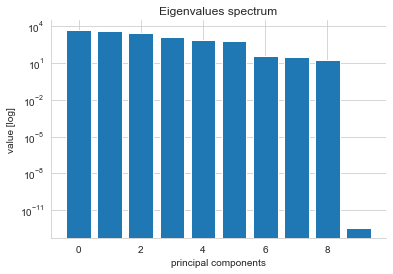

In [95]:
    bar_plot = plt.bar(x=range(len(sorted_eigenvalues)), height=sorted_eigenvalues)
    plt.title(f'Eigenvalues spectrum')
    plt.xlabel('principal components')
    plt.ylabel('value [log]')
    plt.yscale("log")
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    bar_label = sorted_eigenvalues.round(decimals = 3)


In [96]:
K=2
sorted_eigenvalues, sorted_eigenvectors = MDS(distance_matrix, K) 

# Project data in 2D (PC1, PC2)


In [97]:
#Transform train and select PC1 and PC2
a = sorted_eigenvectors.transpose()
b = X_train.transpose()
X_train_PC = np.dot(a,b).transpose()[:,:2]

#Transform trest and select PC1 and PC2
a = sorted_eigenvectors.transpose()
b = X_test.transpose()
X_test_PC = np.dot(a,b).transpose()[:,:2]
 


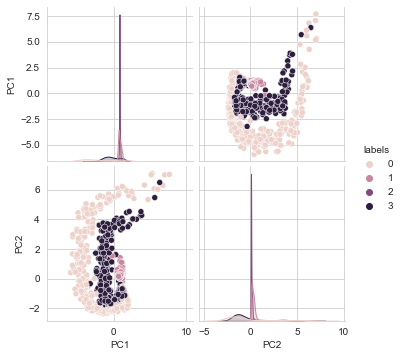

In [98]:
df = pd.DataFrame(X_train_PC, columns=['PC1', 'PC2'])
df["labels"] = y_train
sns.set_style("whitegrid")
sns.pairplot(df,hue = 'labels')
plt.show()

<ipython-input-99-afe71ec737fe>:11: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


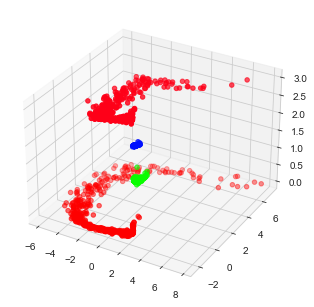

In [99]:
#project in 3D (z axis = labels)

x = df.PC1.values
y = df.PC2.values
z = df.labels.values

# Ploting the scores as scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z, c=z, cmap='hsv')
plt.show()

### [PC1,PC2] Training the Logistic Regression model on the Training set

In [100]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_PC, y_train)

LogisticRegression(random_state=0)

### [PC1,PC2] Predicting the Test set results

In [101]:
y_pred = classifier.predict(X_test_PC)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [2 0]
 [1 1]
 [0 3]
 [1 2]
 [1 1]
 [0 3]
 [1 1]
 [1 2]
 [1 2]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [3 3]
 [1 2]
 [3 3]
 [0 3]
 [1 2]
 [1 1]
 [2 3]
 [3 3]
 [1 1]
 [2 3]
 [1 2]
 [2 0]
 [3 3]
 [2 0]
 [3 3]
 [1 2]
 [0 0]
 [1 1]
 [0 3]
 [1 2]
 [1 2]
 [2 0]
 [0 3]
 [0 0]
 [1 1]
 [3 3]
 [2 1]
 [2 0]
 [1 2]
 [0 3]
 [0 3]
 [1 1]
 [1 2]
 [1 2]
 [1 2]
 [0 0]
 [1 2]
 [1 1]
 [1 1]
 [1 2]
 [0 3]
 [3 3]
 [1 2]
 [2 3]
 [1 2]
 [0 0]
 [1 1]
 [1 1]
 [1 3]
 [0 0]
 [1 2]
 [1 1]
 [1 1]
 [0 0]
 [2 0]
 [3 3]
 [2 0]
 [1 2]
 [0 0]
 [1 2]
 [3 3]
 [0 0]
 [1 2]
 [1 1]
 [1 1]
 [3 3]
 [1 2]
 [1 1]
 [1 2]
 [1 2]
 [0 0]
 [0 3]
 [0 3]
 [1 0]
 [3 3]
 [1 1]
 [1 2]
 [3 0]
 [1 2]
 [1 1]
 [0 0]
 [2 3]
 [1 1]
 [1 2]
 [0 3]
 [1 2]
 [0 0]
 [1 3]
 [1 2]
 [0 3]
 [3 3]
 [0 3]
 [3 3]
 [1 1]
 [0 3]
 [1 0]
 [3 3]
 [1 2]
 [1 2]
 [1 2]
 [2 0]
 [1 1]
 [1 2]
 [1 3]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [3 3]
 [1 2]
 [2 3]
 [0 3]
 [1 2]
 [3 3]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [3 3]
 [2 3]
 [1 1]
 [3 0]
 [1 1]
 [0 3]
 [1 1]
 [1 2]
 [0 3]
 [0 0]
 [0 0]

### [PC1,PC2] Confusion Matrix

In [102]:
from sklearn.metrics import confusion_matrix, accuracy_score
cf_matrix = confusion_matrix(y_test, y_pred)
accuracy= accuracy_score(y_test, y_pred)
print(f'Accuracy score: {accuracy}')

Accuracy score: 0.42


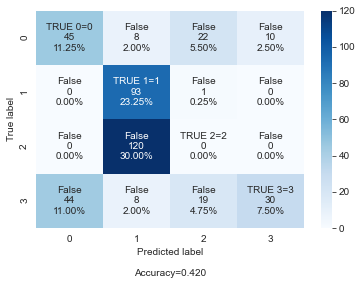

In [103]:
#display matrix
group_names = ["TRUE 0=0","False","False","False", 
          "False","TRUE 1=1","False","False", 
          "False","False","TRUE 2=2","False", 
          "False","False","False","TRUE 3=3"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(4,4)

#if it is a binary confusion matrix, show some more stats
if len(cf_matrix)==2:
    #Metrics for Binary Confusion Matrices
    precision = cf_matrix[1,1] / sum(cf_matrix[:,1])
    recall    = cf_matrix[1,1] / sum(cf_matrix[1,:])
    f1_score  = 2*precision*recall / (precision + recall)
    stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(accuracy,precision,recall,f1_score)
else:
    stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues' )
plt.ylabel('True label')
plt.xlabel('Predicted label' + stats_text)
plt.show()
    
#TODO improve as per 
# https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
# https://github.com/DTrimarchi10/confusion_matrix

# For an increasing number of PCs ...

In [104]:
accuracy_list=[]
mutual_info_list=[]

for pc in range(1,11,1):
    
    #Transform train and select PC1 and PC2
    a = sorted_eigenvectors.transpose()
    b = X_train.transpose()
    X_train_PC = np.dot(a,b).transpose()[:,:pc]

    #Transform trest and select PC1 and PC2
    a = sorted_eigenvectors.transpose()
    b = X_test.transpose()
    X_test_PC = np.dot(a,b).transpose()[:,:pc]
    
    classifier = LogisticRegression(random_state = 0)
    classifier.fit(X_train_PC, y_train)
    y_pred = classifier.predict(X_test_PC)
    
    cf_matrix = confusion_matrix(y_test, y_pred)
    accuracy= accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)
    
    mi=mutual_info_score(y_test, y_pred)
    
    mutual_info_list.append(mi)
    print(f'PC 1 to PC{pc}     Accuracy score: {accuracy}   Mutual Information: {mi}')
    
   

PC 1 to PC1     Accuracy score: 0.4125   Mutual Information: 0.34092480657056756
PC 1 to PC2     Accuracy score: 0.42   Mutual Information: 0.5475783071866911
PC 1 to PC3     Accuracy score: 0.855   Mutual Information: 0.9613341714926902
PC 1 to PC4     Accuracy score: 0.9125   Mutual Information: 1.0747077074916316
PC 1 to PC5     Accuracy score: 0.9225   Mutual Information: 1.1092481949474295
PC 1 to PC6     Accuracy score: 0.9325   Mutual Information: 1.128974400134739
PC 1 to PC7     Accuracy score: 0.945   Mutual Information: 1.1706469062171792
PC 1 to PC8     Accuracy score: 0.945   Mutual Information: 1.1706469062171792
PC 1 to PC9     Accuracy score: 0.9525   Mutual Information: 1.1903044760174448
PC 1 to PC10     Accuracy score: 0.955   Mutual Information: 1.2131723178263056


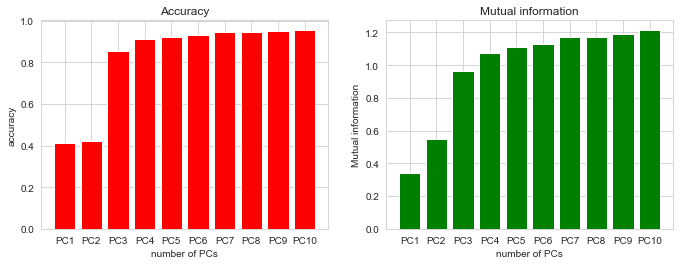

In [88]:
pcs = ['PC'+str(nnn+1) for nnn in range(10)]

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
fig.tight_layout(pad=3)

ax[0].bar(pcs, accuracy_list,    color='r')
ax[0].set_ylim(bottom=0)
ax[0].set(title='Accuracy', ylabel='accuracy', xlabel='number of PCs')

ax[1].bar(pcs,mutual_info_list,  color='g')
ax[1].set_ylim(bottom=0)
ax[1].set(title='Mutual information', ylabel='Mutual information', xlabel='number of PCs')

plt.show()

In [105]:
df = pd.DataFrame(pcs, columns=['PCs'])
df['MDS_accuracy'] = accuracy_list
df['MDS_mutual_info']= mutual_info_list
df.to_csv('metrics_MDS.csv', index=False)